# **Speech Processing Lab 5: Phase-I**

Rishabh Tripathi (180030036)

## **Aim**
* To study different sound units present in majority of Indian languages.
* To understand the production mechanism of each sound unit.
* To learn the time domain and frequency domain characteristics of different sound units.


## **Theory**
The sound units of most languages in India are broadly classified into two categories, namely, vowels and consonants. These two broad categories are mainly based on the shape of the vocal tract. In case of vowels, the vocal tract shape is wide open without any constriction along its length starting from the glottis till the lips and is excited by voiced excitation source. Alternatively, in case of consonants, their may be constriction in vocal tract shape some where along its length and is excited by either voiced, unvoiced and both types of excitation.

### **Short and Long vowel sounds**
From the production process point of view there is no distinction between short and long vowels, except that the duration of production will be longer, typically nearly double that of short vowels.

### **Diphthongs**
In case of diphthongs, as the name indicates, two vowel sounds are produced in succession without any pause. The production process is such that the vocal tract shape is initially producing the first vowel and midway during the production of the first vowel it changes the shape to produce the other vowel.

### **Stop Consonants**
During the production of stop consonants the vocal tract is completely closed at some point, somewhere along the length of the vocal tract and suddenly released. The stop consonants are further classified into different cases based on two criteria, namely, place of articulation (POA) and manner of articulation(MOA). Here we choose the POA called **Velar** and analyse all sounds corresponding to different MOA.

### **Velar Stop Consonants**
In this category the total constriction for the production of stop consonants occur at the velar region. We have the sounds |k|, |kh|, |g| and |gh| in this category.

In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
from matplotlib import cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 5.1
!ls

/content/drive/MyDrive/Speech Processing Lab/Lab 5.1
consonant_aga.wav   consonant_akha.wav	diphthong_ao.wav   test.wav
consonant_agha.wav  diph_part_a.wav	long_vowel_a.wav
consonant_aka.wav   diph_part_o.wav	short_vowel_a.wav


## **Problem A**
Short vowels, Long vowels and Diphthongs

1. Record the sounds of any one short vowel sound, long vowel sound and a diphthong (Also, record the two sounds present in the diphthong).
2. Plot the time domain waveform, magnitude spectrum and the spectrogram for each of the above sounds.
3. Inspect each of the above plots and write your observations comparing them.


### **Procedure**
1. Record the 3 sounds using WaveSurfer and save the .wav files in Google Drive.
2. Load the 3 audio files using Librosa library.
3. We use the 3 functions defined below to plot the waveform, magnitude spectrum and the spectrogram for the audio files.

In [ ]:
# Loading the audio files
short_vowel, fs = librosa.load("short_vowel_a.wav", sr = 16000)
long_vowel, fs = librosa.load("long_vowel_a.wav", sr = 16000)
diphthong, fs = librosa.load("diphthong_ao.wav", sr = 16000)
diph_part_a, fs = librosa.load("diph_part_a.wav", sr = 16000)
diph_part_o, fs = librosa.load("diph_part_o.wav", sr = 16000)

In [ ]:
# Function to plot the waveform
def wave_plot(sound, sound_name):
    t = np.arange(0, sound.shape[0]/fs, 1/fs)
    plt.figure(figsize=(15,5))
    plt.plot(t, sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
# Function to plot the magnitude spectrum
def plot_spectrum(sound, sound_name):
    
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)
    
    plt.figure(figsize=(15,5))
    plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
    plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
    plt.yscale('log')
    plt.xlim((0, 10000))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
# Function to plot the spectrogram
def plot_spectrogram(sound, sound_name, frame_rate=8):

    D = librosa.stft(sound, n_fft=512, win_length=128, hop_length=frame_rate)  # STFT
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.figure(figsize=(20,5))
    librosa.display.specshow(S_db, x_axis='s', y_axis='linear', sr=fs, hop_length=frame_rate, cmap=cm.gnuplot2)
    plt.title("Spectrogram of "+ "/" + sound_name + "/")
    plt.colorbar()
    plt.show()

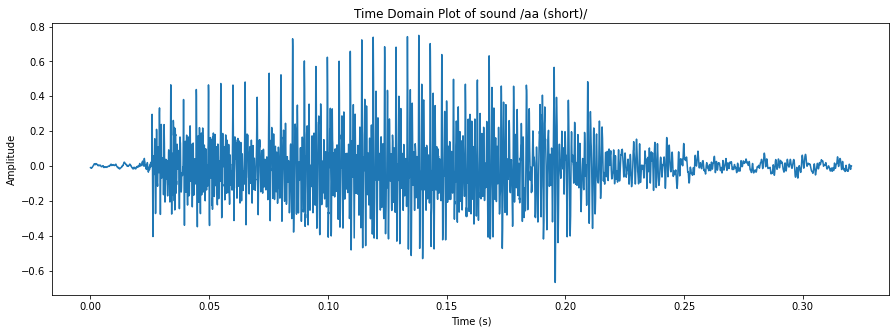

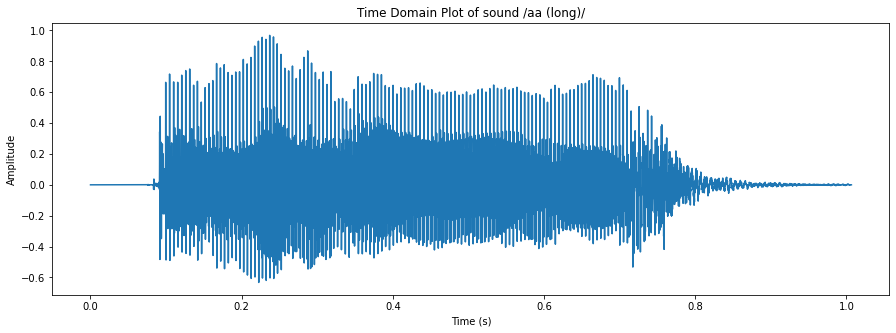

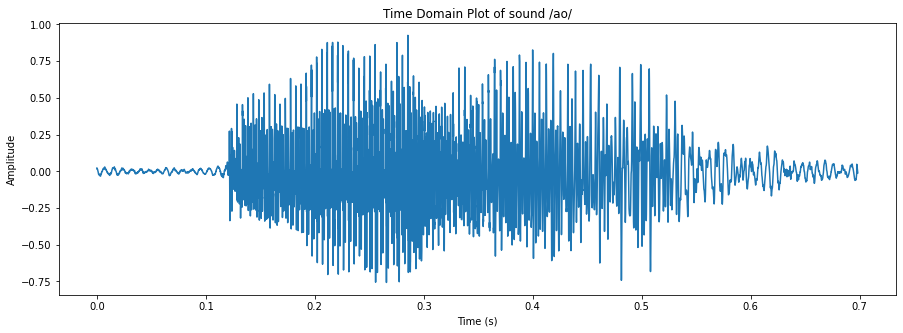

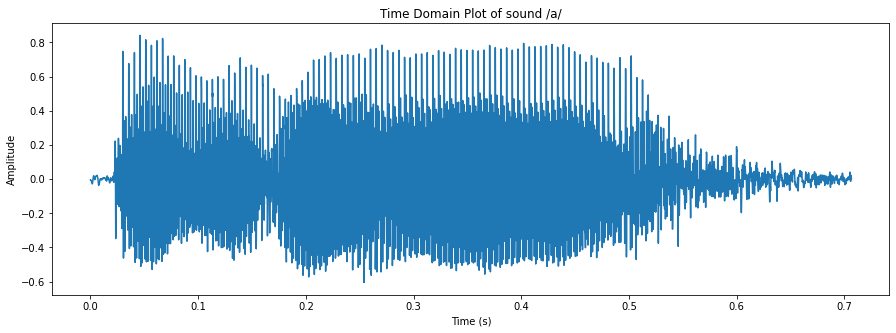

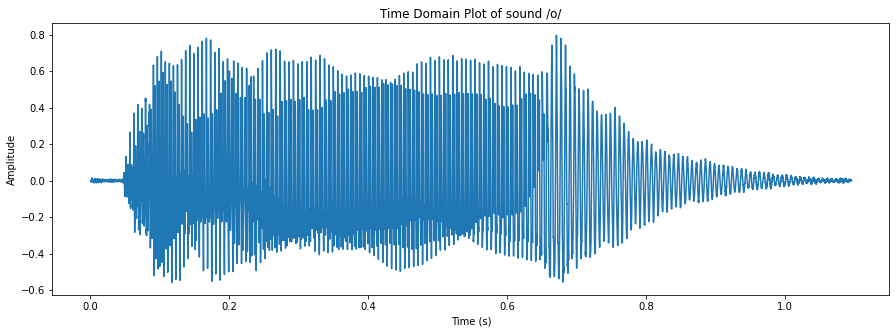

In [ ]:
wave_plot(short_vowel, "aa (short)")
wave_plot(long_vowel, "aa (long)")
wave_plot(diphthong, "ao")
wave_plot(diph_part_a, "a")
wave_plot(diph_part_o, "o")

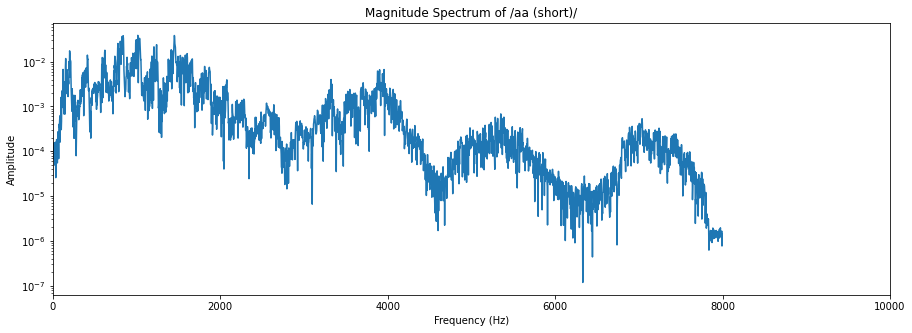

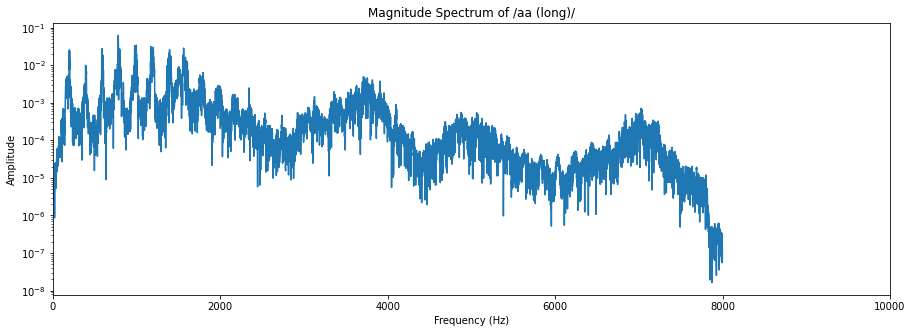

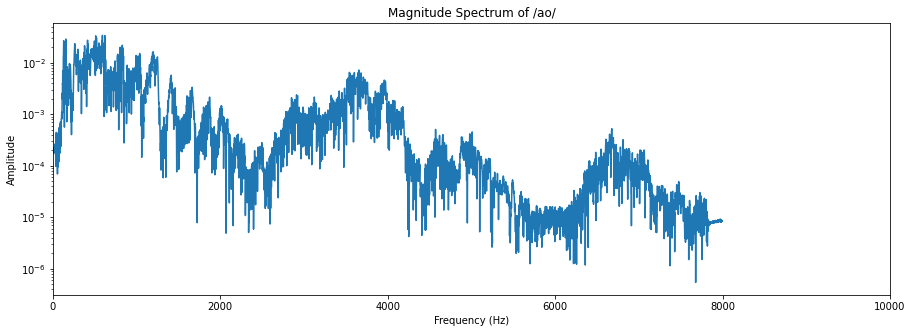

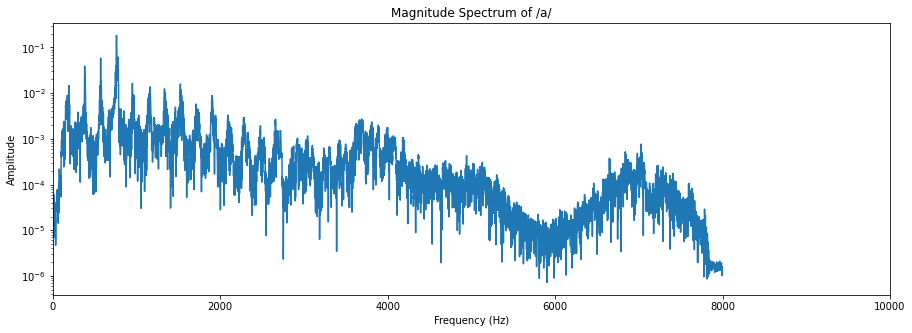

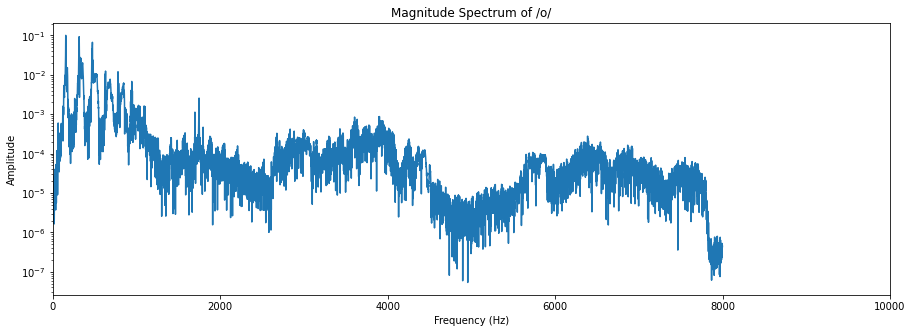

In [ ]:
plot_spectrum(short_vowel, "aa (short)")
plot_spectrum(long_vowel, "aa (long)")
plot_spectrum(diphthong, "ao")
plot_spectrum(diph_part_a, "a")
plot_spectrum(diph_part_o, "o")

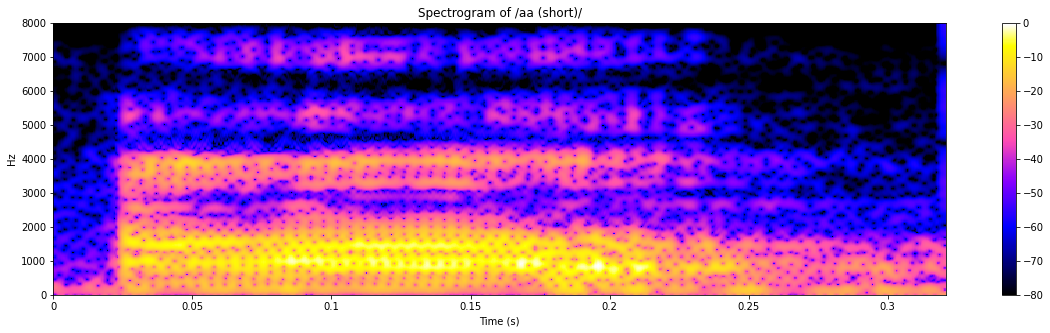

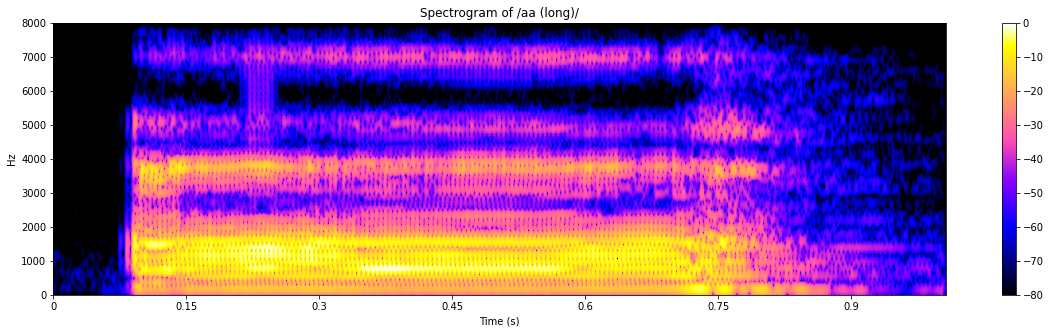

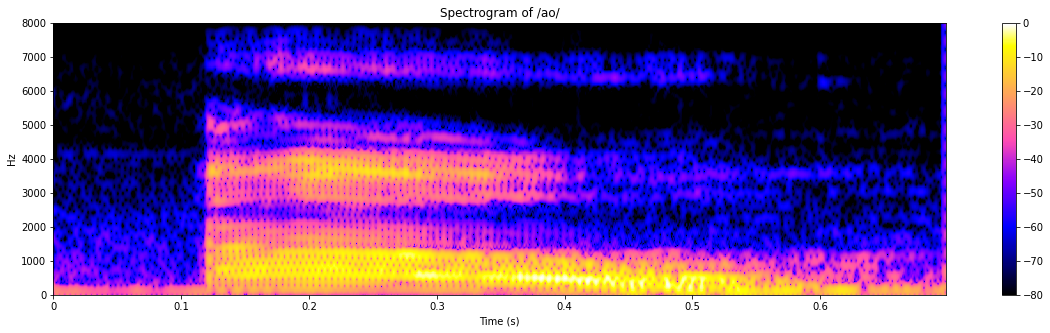

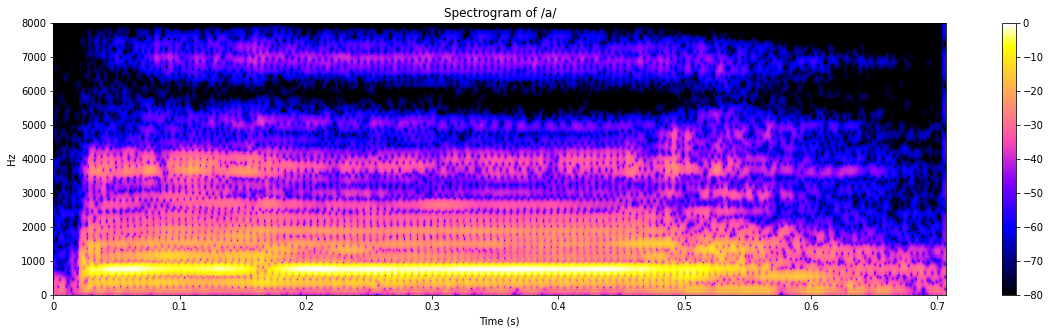

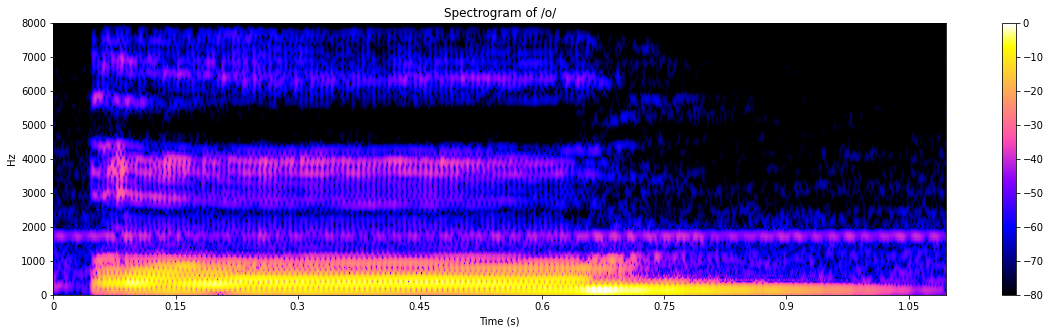

In [ ]:
plot_spectrogram(short_vowel, "aa (short)")
plot_spectrogram(long_vowel, "aa (long)")
plot_spectrogram(diphthong, "ao")
plot_spectrogram(diph_part_a, "a")
plot_spectrogram(diph_part_o, "o")

### **Observations**

1. The short vowel |a| and the long vowel |aa| have the same magnitude spectrum. Their waveforms only differ in the duration. Even the spectrogram shows similar frequency content over the time in both cases.
2. In case if the diphthong |ao|, the first part is similar in frequency content to the sound |a| and the second part is similar to the sound |o|. The spectrogram of the diphthong shows this transition. 

## **Problem B**
Stop Consonants

1. Pick up any one of the POA(Position of Articulation) types and record the sounds present in the respective row for all the MOA(Manner of Articulation) types.
2. Plot the time domain waveform, the magnitude spectrum and the spectrogram for each of the above sounds.
3. Inspect the above plots and describe the various sub phonetic events that take place, their relative duration and how they vary across different kinds of MOA.


### **Procedure**
1. We choose the POA Velar and record all 4 stop consonants using WaveSurfer and save them as .wav files in Google Drive. (we record sounds with a vowel before the stop comsonants as this helps us observe the sub-phonetic events better)
2. Load the audio files using Librosa library.
3. We use the functions defined above to plot the waveform, magnitude spectrum and spectrogram of each sound.

In [ ]:
# Loading the audio files
aka, fs = librosa.load("consonant_aka.wav", sr = 16000)
akha, fs = librosa.load("consonant_akha.wav", sr = 16000)
aga, fs = librosa.load("consonant_aga.wav", sr = 16000)
agha, fs = librosa.load("consonant_agha.wav", sr = 16000)

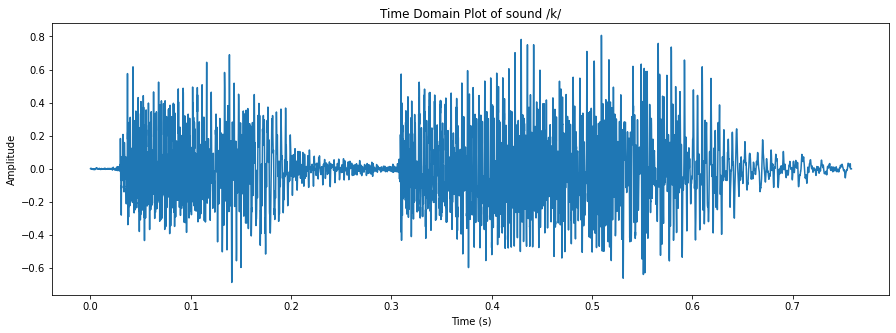

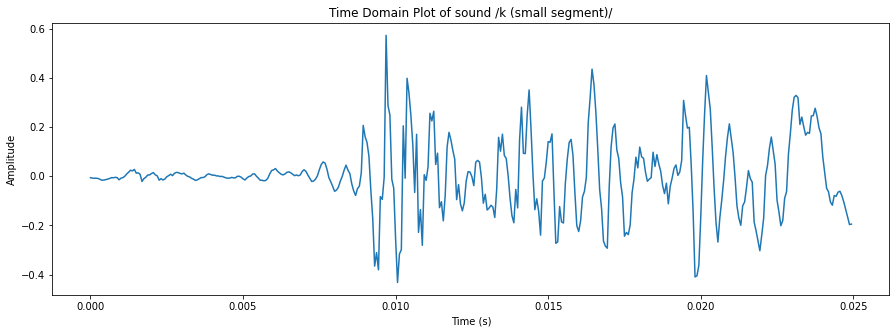

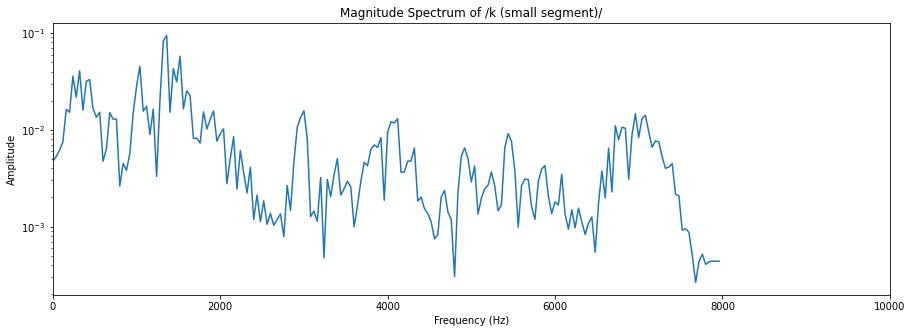

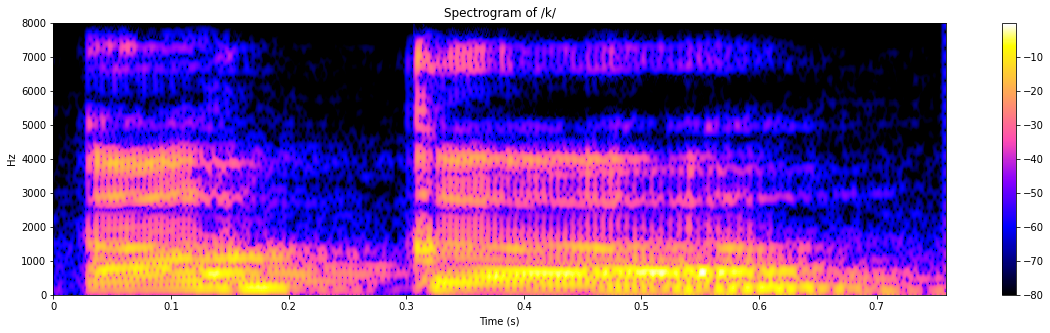

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |k|

# k -> 0.300s to 0.325s
wave_plot(aka, "k")
wave_plot(aka[int(0.3*fs):int(0.325*fs)], "k (small segment)")
plot_spectrum(aka[int(0.3*fs):int(0.325*fs)], "k (small segment)")
plot_spectrogram(aka, "k")

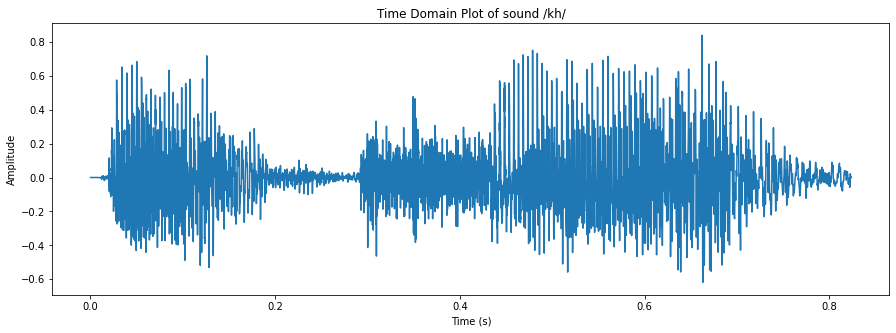

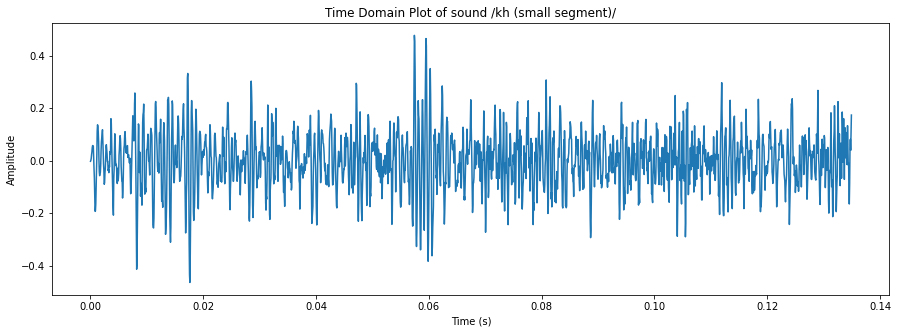

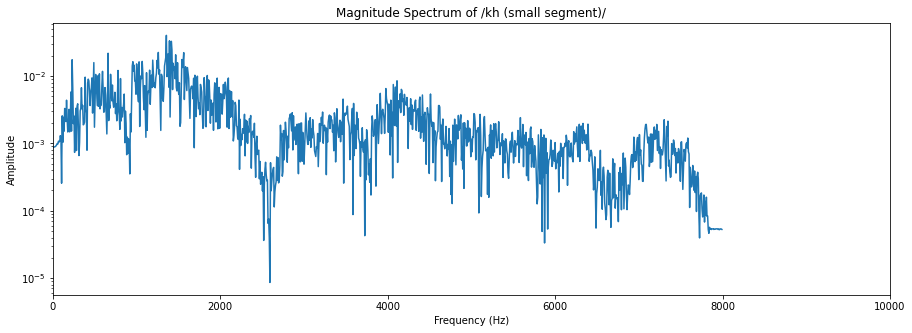

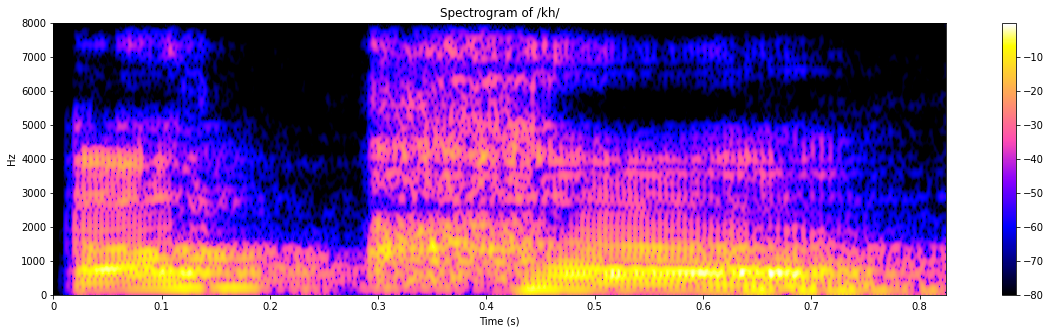

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |kh|

# kh -> 0.292s to 0.427s
wave_plot(akha, "kh")
wave_plot(akha[int(0.292*fs):int(0.427*fs)], "kh (small segment)")
plot_spectrum(akha[int(0.292*fs):int(0.427*fs)], "kh (small segment)")
plot_spectrogram(akha, "kh")

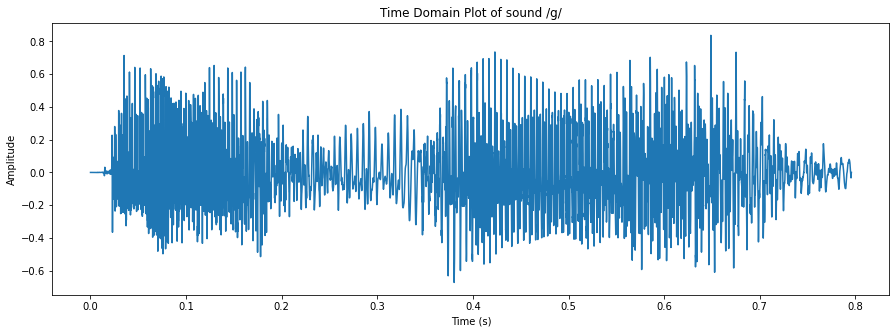

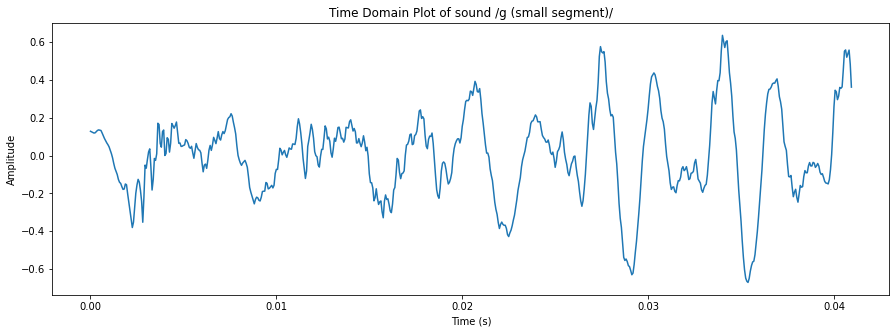

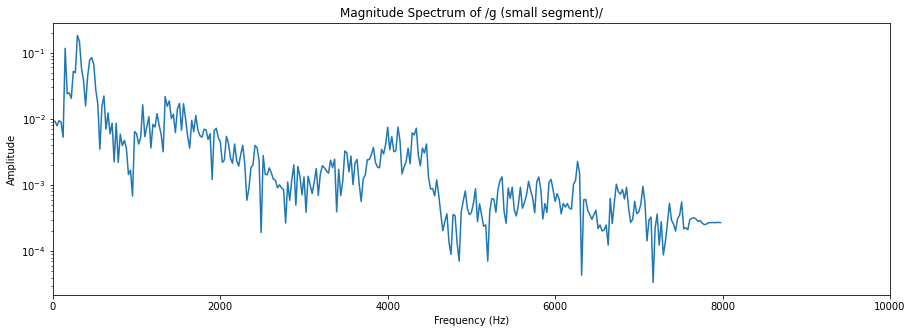

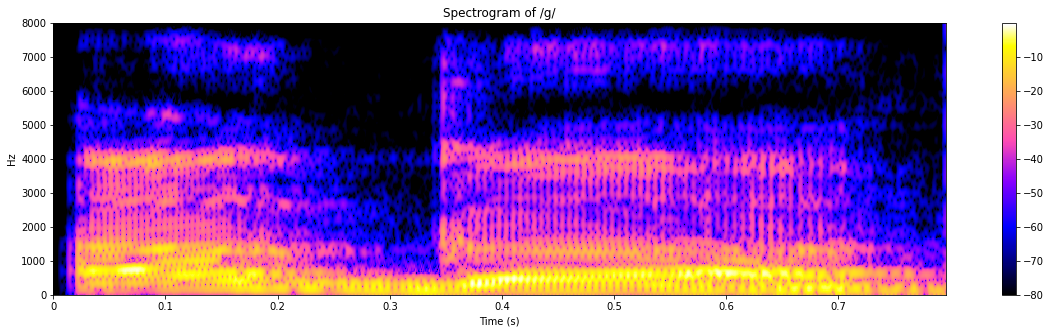

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |g|

# g -> 0.345s to 0.386s
wave_plot(aga, "g")
wave_plot(aga[int(0.345*fs):int(0.386*fs)], "g (small segment)")
plot_spectrum(aga[int(0.345*fs):int(0.386*fs)], "g (small segment)")
plot_spectrogram(aga, "g")

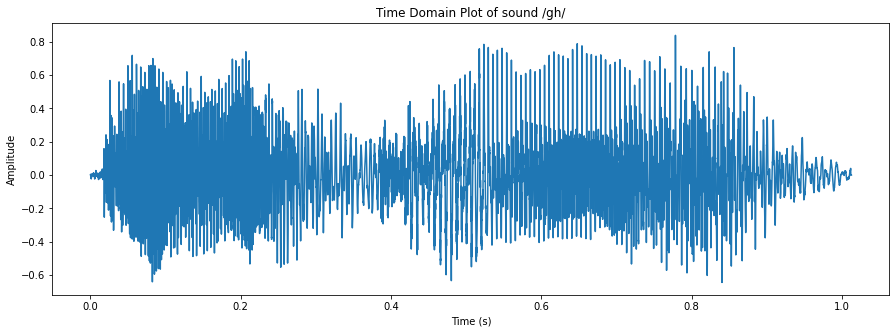

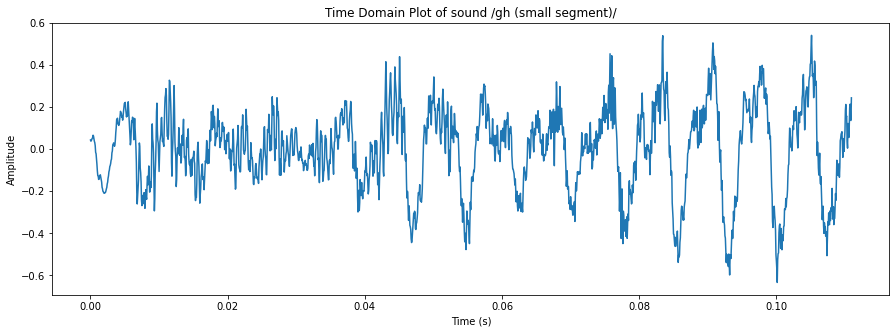

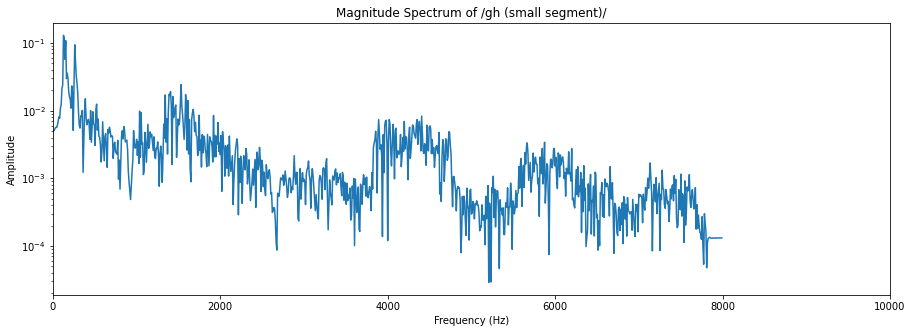

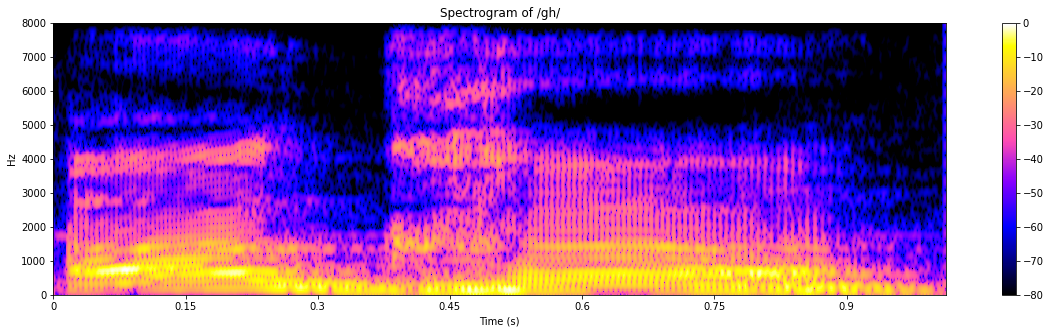

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |gh|

# gh -> 0.380s to 0.491s
wave_plot(agha, "gh")
wave_plot(agha[int(0.380*fs):int(0.491*fs)], "gh (small segment)")
plot_spectrum(agha[int(0.380*fs):int(0.491*fs)], "gh (small segment)")
plot_spectrogram(agha, "gh")

### **Observation**

#### UVUA - |k|
1. In case of sound |k| we observe that there is no voicing as the short segment waveform shows that |k| sound has no periodicity.
2. Also the sound is not aspirated as the spectrogram shows high frequency content for a very short duration. 
3. The sub-phonetic events are observable very well in the spectrogram - the closure with no speech activity, the release with a burst of energy and short duration of frication (high frequency content).

#### UVA - |kh|
1. In case of sound |kh| we observe that there is no voicing as the short segment waveform shows that |k| sound has no periodicity.
2. The sound |kh| is aspirated as the spectrogram shows high frequency content for a longer duration as compared to the UVUA sound |k|.
3. The sub-phonetic events are observable very well in the spectrogram - the closure with no speech activity, the release with a burst of energy and long duration of frication (high frequency content).

#### VUA - |g|
1. In case of sound |g| we observe that there is voicing as the short segment waveform has some periodicity. The  low amplitude nearly periodic signal is present in the all sub-phonetic events. This causes the low frequency peaks in the magnitude spectrum.
2. The sound |g| is not aspirated as the spectrogram shows high frequency content for a very short duration. 
3. The sub-phonetic events are observable very well in the spectrogram - the closure with only the low amplitude periodic signal, the release with a burst of energy and very short duration of frication (high frequency content). The yellow strip in the low frequency region is present throughout the sound (shows voicing throughout the sound).

#### VA - |gh|
1. In case of sound |gh| we observe that there is no voicing as the short segment waveform has some periodicity. The  low amplitude nearly periodic signal is present in the all sub-phonetic events. This causes the low frequency peaks in the magnitude spectrum.
2. The sound |gh| is aspirated as the spectrogram shows high frequency content for a longer duration as compared to the VUA sound |g|.
3. The sub-phonetic events are observable very well in the spectrogram - the closure with only the low amplitude periodic signal, the release with a burst of energy and long duration of frication (high frequency content). The yellow strip in the low frequency region is present throughout the sound (shows voicing throughout the sound).